<a href="https://colab.research.google.com/github/Pedrammdp/Machine-Learning-Deep-Learning-/blob/main/QR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Required

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from math import copysign, hypot

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


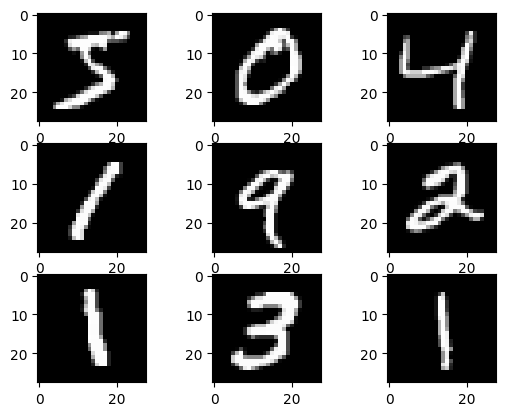

In [ ]:
from matplotlib import pyplot
for i in range(9):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

# QR Decomposition With House Holder Matices

In [ ]:
def householder_qr(A):
    """
    Compute Q and R using Householder reflections.

    Parameters:
        A (numpy array): The input matrix A.

    Returns:
        Q (numpy array): The orthogonal matrix Q.
        R (numpy array): The upper triangular matrix R.
    """

    # Get the dimensions of the matrix
    m, n = A.shape

    # Initialize Q and R
    Q = np.eye(m)
    R = A.astype(np.float64).copy()

    for k in range(min(m, n)):
        # Select the relevant columns from R
        x = R[k:, k]

        # Create a vector e1 with 1 at index 0
        e1 = np.zeros_like(x)
        e1[0] = 1.0

        # Compute alpha (the Householder reflection parameter)
        alpha = np.linalg.norm(x)

        if alpha == 0:
            # If x is all zeros, skip this iteration
            continue

        # Make sure alpha has the correct sign
        if x[0] >= 0:
            alpha = -alpha

        # Compute the Householder vector v
        v = x - alpha * e1

        # Normalize v to have unit length
        norm_v = np.linalg.norm(v)
        if norm_v == 0:
            continue  # If v is all zeros, skip this iteration
        v = v / norm_v

        # Apply the Householder reflection to R
        R[k:, k:] -= 2 * np.outer(v, np.dot(v, R[k:, k:]))

        # Apply the Householder reflection to Q
        Q[:, k:] -= 2 * np.outer(np.dot(Q[:, k:], v), v)

    return Q, R

# Perfroming QR On Emnist Data

In [ ]:
# Define constants
NUM_TRAIN = 200

# Flatten the training data for matrix operations
flatten_train_X = train_X.reshape(train_X.shape[0], -1)

# Get unique classes from the dataset
classes = np.unique(train_y)

# Initialize dictionaries to store QR decomposition and A matrices
qr_decomposition = {}
A_matrix = {}

for class_label in classes:
    # Select a subset of training data for this class (NUM_TRAIN instances)
    class_indices = np.where(train_y == class_label)[0][:NUM_TRAIN]

    # Extract the corresponding features from the flattened data
    data_matrix = flatten_train_X[class_indices, :]

    # Compute QR decomposition using the Householder reflection method
    Q_householder, R_householder = householder_qr(data_matrix.T)
    print(f"\nQR Decomposition (Householder) for class {class_label}:")
    print(f"Q shape: {Q_householder.shape}")
    print("R:")
    print(R_householder)

    # Store the results in dictionaries
    qr_decomposition[class_label] = (Q_householder, R_householder)
    A_matrix[class_label] = data_matrix.T

print("\nQR Decomposition Results:")
for class_label, result in qr_decomposition.items():
    Q, R = result
    print(f"\nClass {class_label}:")
    print(f"Q shape: {Q.shape}")
    print("R:")
    print(R)


QR Decomposition (Householder) for class 0:
Q shape: (784, 784)
R:
[[-2598.14183601 -2432.39068492 -1842.02299262 ... -2200.60695716
  -2354.69169359 -2293.55569331]
 [    0.         -1378.07349438  -289.43698067 ...   -53.09160689
   -645.09393896  -330.15909391]
 [    0.             0.         -2195.81158775 ...  -416.39989419
   -306.20055095   177.43078476]
 ...
 [    0.             0.             0.         ...     0.
      0.             0.        ]
 [    0.             0.             0.         ...     0.
      0.             0.        ]
 [    0.             0.             0.         ...     0.
      0.             0.        ]]

QR Decomposition (Householder) for class 1:
Q shape: (784, 784)
R:
[[-1948.7875718   -579.95341122  -381.53722384 ...  -231.89751748
  -1243.66710619 -1122.37322921]
 [    0.         -1915.50882034 -1184.17788602 ...  -734.68899163
   -348.9939656   -413.27443061]
 [    0.             0.          -879.41234986 ...  -656.99555853
   -112.38273891   -99.3

In [ ]:
def least_square_qr(Q, R, b, A):
    """
    Compute the least squares solution using QR decomposition.

    Parameters:
        Q (numpy array): The orthogonal matrix from the QR decomposition.
        R (numpy array): The upper triangular matrix from the QR decomposition.# Define the number of test cases to evaluate
NUM_TESTCASE = 40

# Initialize variables to track correct answers and accuracy
correct_answers = 0
test_cases_evaluated = NUM_TESTCASE

for i in range(NUM_TESTCASE):
    # Classify the current test sample using the classifier function
    predicted_class_label = classifier(test_X[i].flatten())

    # Compare the predicted class label with the ground-truth answer
    if predicted_class_label == test_y[i]:
        correct_answers += 1
        print(f"Test {i}: Correct answer")
    else:
        print(f"Test {i}: Wrong answer")

# Print the overall accuracy of the classifier
accuracy = correct_answers / NUM_TESTCASE
print(f"Accuracy: {accuracy}")
        b (numpy array): The right-hand side vector.
        A (numpy array): The original matrix.

    Returns:
        residual (float): The least squares residual error.
    """

    # Project the right-hand side vector b onto the orthogonal matrix Q
    Qt_b = np.dot(Q.T, b)

    # Solve the normal equations using QR decomposition and lstsq
    x = np.linalg.lstsq(R, Qt_b, rcond=None)[0]

    # Compute the residual error as a norm of the difference between b and Ax
    residual_error = np.linalg.norm(b - A @ x)

    return residual_error

In [ ]:
def classifier(test):
    """
    Classify a test sample using least squares QR decomposition.

    Parameters:
        test (numpy array): The input test sample.

    Returns:
        class_label (int): The predicted class label.
    """

    # Initialize variables to store the minimum residual and corresponding class label
    min_residual = 1e18
    best_class_label = -1

    # Iterate over the QR decomposition results for each class
    for class_label, (Q, R) in qr_decomposition.items():
        # Compute the least squares residual error using QR decomposition
        least_squares_error = least_square_qr(Q, R, test, A_matrix[class_label])

        # Update the minimum residual and corresponding class label if necessary
        if least_squares_error < min_residual:
            min_residual = least_squares_error
            best_class_label = class_label

    return best_class_label

In [ ]:
# Define the number of test cases to evaluate
NUM_TESTCASE = 20

# Initialize variables to track correct answers and accuracy
correct_answers = 0

for i in range(NUM_TESTCASE):
    # Classify the current test sample using the classifier function
    predicted_class_label = classifier(test_X[i].flatten())

    # Compare the predicted class label with the ground-truth answer
    if predicted_class_label == test_y[i]:
        correct_answers += 1
        print(f"Test {i}: Correct answer")
    else:
        print(f"Test {i}: Wrong answer")

# Print the overall accuracy of the classifier
accuracy = correct_answers / NUM_TESTCASE
print(f"Accuracy: {accuracy}")

Test 0: Correct answer
Test 1: Correct answer
Test 2: Correct answer
Test 3: Correct answer
Test 4: Correct answer
Test 5: Correct answer
Test 6: Correct answer
Test 7: Correct answer
Test 8: Correct answer
Test 9: Wrong answer
Test 10: Correct answer
Test 11: Correct answer
Test 12: Correct answer
Test 13: Correct answer
Test 14: Correct answer
Test 15: Correct answer
Test 16: Correct answer
Test 17: Correct answer
Test 18: Wrong answer
Test 19: Correct answer
Accuracy: 0.9


# Givens

In [ ]:
def givens_rotation(a, b):
    """
    Compute Givens rotation factors to zero out a given row.

    Parameters:
        a (float): The target element in the diagonal of R.
        b (float): The off-diagonal element that needs to be zeroed out.

    Returns:
        c (float): The cosine factor.
        s (float): The sine factor.
    """
    # Compute the norm of the input row
    r = np.hypot(a, b)

    # Normalize the target elements
    c = a / r
    s = -b / r

    return c, s


def update_qr(Q, R, b):
    """
    Update QR decomposition using Householder reflections.

    Parameters:
        Q (array): The orthogonal matrix.
        R (array): The upper triangular matrix.
        b (array): The vector to reflect against the diagonal of R.

    Returns:
        Q_new (array): The updated orthogonal matrix.
        R_new (array): The updated upper triangular matrix.
    """
    # Define tolerance for numerical stability
    tolerance = 1e-8

    # Get the dimensions of the input matrices and vectors
    m, _ = R.shape
    _, k = b.shape
    # Compute the initial reflection vector V
    V = Q.T @ b

    # Stack the current R matrix with V to get the new R matrix
    R_new = np.hstack((R, V))

    # Copy the existing Q matrix as the starting point for the updated Q matrix
    Q_new = Q.copy()

    # Iterate over the rows of the new R matrix and apply Givens rotations
    for j in range(R.shape[1], R_new.shape[1]):
        for i in range(j + 1, m):
            if np.abs(R_new[i, j]) > tolerance:
                # Compute the Givens rotation factors to zero out the off-diagonal element
                c, s = givens_rotation(R_new[j, j], R_new[i, j])

                # Assemble the Householder reflection matrix G
                G = np.array([[c, -s],
                              [s,  c]])

                # Apply the reflection to the corresponding rows of Q and R
                rows = np.array([j, i])
                R_new[rows, j:] = G @ R_new[rows, j:]
                Q_new[:, rows] = Q_new[:, rows] @ np.array([[c, s],
                                                            [-s, c]])

    return Q_new, R_new

In [ ]:
# Define the number of new samples to add for each class
NUM_NEW_DATA = 20

for c in classes:
    # Get the indices of the new samples for this class
    # (NUM_TRAIN:NUM_TRAIN + NUM_NEW_DATA skips the first 'NUM_TRAIN' samples)
    class_indices = np.where(train_y == c)[0][NUM_TRAIN:NUM_TRAIN + NUM_NEW_DATA]

    # Print the number of new samples for this class
    print(f"Class {c}: {len(class_indices)} new samples")

    # Get the corresponding data matrix by flattening the train_X samples
    data_matrix = flatten_train_X[class_indices, :]

    # Retrieve the QR decomposition for this class from qr_decomposition
    Q, R = qr_decomposition[c]

    # Print the shapes of Q and R (for debugging purposes)
    print(f"Q shape: {Q.shape}, R shape: {R.shape}")

    # Update the QR decomposition using Householder reflections to include the new data
    Q_, R_ = update_qr(Q, R, data_matrix.T)

    # Store the updated QR decomposition back in qr_decomposition
    qr_decomposition[c] = (Q_, R_)

    # Append the new data to A by concatenating along the columns axis
    A_matrix[c] = np.concatenate((A_matrix[c], data_matrix.T), axis=1)

    # Print the shape of the updated A matrix for this class (for debugging purposes)
    print(f"A shape: {A_matrix[c].shape}")

    # Print the shapes of the updated Q_ and R_ matrices (for debugging purposes)
    print(f"Q_ shape: {Q_.shape}, R_ shape: {R_.shape}")

Class 0: 20 new samples
Q shape: (784, 784), R shape: (784, 200)
A shape: (784, 220)
Q_ shape: (784, 784), R_ shape: (784, 220)
Class 1: 20 new samples
Q shape: (784, 784), R shape: (784, 200)
A shape: (784, 220)
Q_ shape: (784, 784), R_ shape: (784, 220)
Class 2: 20 new samples
Q shape: (784, 784), R shape: (784, 200)
A shape: (784, 220)
Q_ shape: (784, 784), R_ shape: (784, 220)
Class 3: 20 new samples
Q shape: (784, 784), R shape: (784, 200)
A shape: (784, 220)
Q_ shape: (784, 784), R_ shape: (784, 220)
Class 4: 20 new samples
Q shape: (784, 784), R shape: (784, 200)
A shape: (784, 220)
Q_ shape: (784, 784), R_ shape: (784, 220)
Class 5: 20 new samples
Q shape: (784, 784), R shape: (784, 200)
A shape: (784, 220)
Q_ shape: (784, 784), R_ shape: (784, 220)
Class 6: 20 new samples
Q shape: (784, 784), R shape: (784, 200)
A shape: (784, 220)
Q_ shape: (784, 784), R_ shape: (784, 220)
Class 7: 20 new samples
Q shape: (784, 784), R shape: (784, 200)
A shape: (784, 220)
Q_ shape: (784, 784

In [ ]:
# Define the number of test cases to evaluate
NUM_TESTCASE = 20

# Initialize variables to track correct answers and accuracy
correct_answers = 0

for i in range(NUM_TESTCASE):
    # Classify the current test sample using the classifier function
    predicted_class_label = classifier(test_X[i].flatten())

    # Compare the predicted class label with the ground-truth answer
    if predicted_class_label == test_y[i]:
        correct_answers += 1
        print(f"Test {i}: Correct answer")
    else:
        print(f"Test {i}: Wrong answer")

# Print the overall accuracy of the classifier
accuracy = correct_answers / NUM_TESTCASE
print(f"Accuracy: {accuracy}")

Test 0: Correct answer
Test 1: Correct answer
Test 2: Correct answer
Test 3: Correct answer
Test 4: Correct answer
Test 5: Correct answer
Test 6: Correct answer
Test 7: Correct answer
Test 8: Correct answer
Test 9: Wrong answer
Test 10: Correct answer
Test 11: Correct answer
Test 12: Correct answer
Test 13: Correct answer
Test 14: Correct answer
Test 15: Correct answer
Test 16: Correct answer
Test 17: Correct answer
Test 18: Wrong answer
Test 19: Correct answer
Accuracy: 0.9
